In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# 读取数据并处理缺失值
data = pd.read_csv("accident.csv")
data["Gender"].fillna("Unknown", inplace=True)  # 填充性别空值为"Unknown"
data["Speed_of_Impact"].fillna(data["Speed_of_Impact"].median(), inplace=True)  # 用中位数填充缺失速度
data["Helmet_Used"] = data["Helmet_Used"].map({"Yes": 1, "No": 0})  # 转换为数值
data["Seatbelt_Used"] = data["Seatbelt_Used"].map({"Yes": 1, "No": 0})

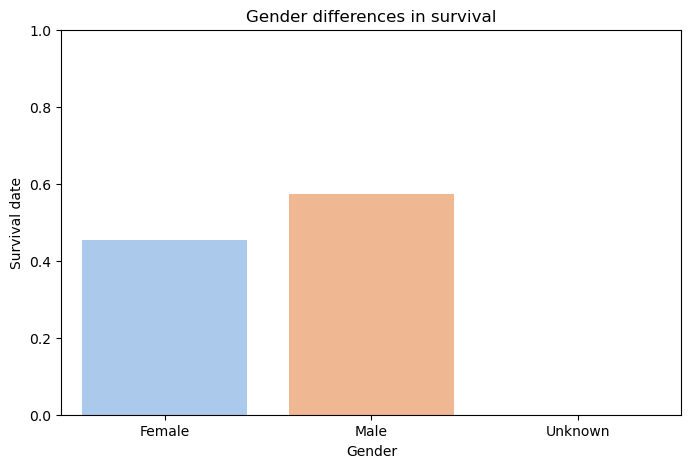

In [11]:
survival_rate = data.groupby("Gender")["Survived"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x="Gender", y="Survived", data=survival_rate, palette="pastel")
plt.title("Gender differences in survival")
plt.xlabel("Gender")
plt.ylabel("Survival date")
plt.ylim(0, 1)
plt.savefig("gender_survival.png")

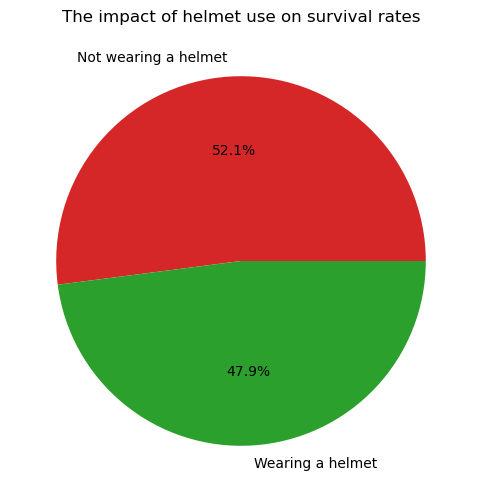

In [17]:
helmet_survival = data.groupby("Helmet_Used")["Survived"].mean()
labels = ["Not wearing a helmet", "Wearing a helmet"]
plt.figure(figsize=(6, 6))
plt.pie(helmet_survival, labels=labels, autopct="%.1f%%", colors=["#d62728", "#2ca02c"])
plt.title("The impact of helmet use on survival rates")
plt.savefig("helmet_pie.png")

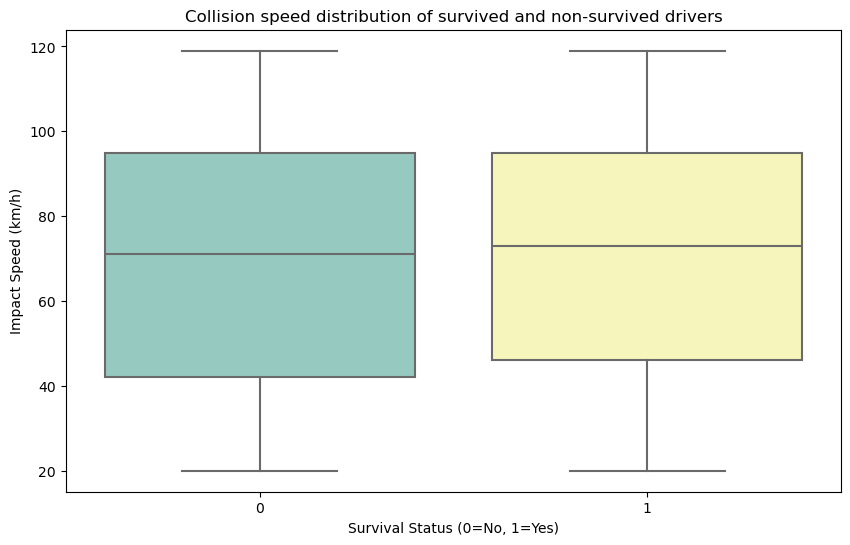

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Survived", y="Speed_of_Impact", data=data, palette="Set3")
plt.title("Collision speed distribution of survived and non-survived drivers")
plt.xlabel("Survival Status (0=No, 1=Yes)")
plt.ylabel("Impact Speed (km/h)")
plt.savefig("speed_boxplot.png")

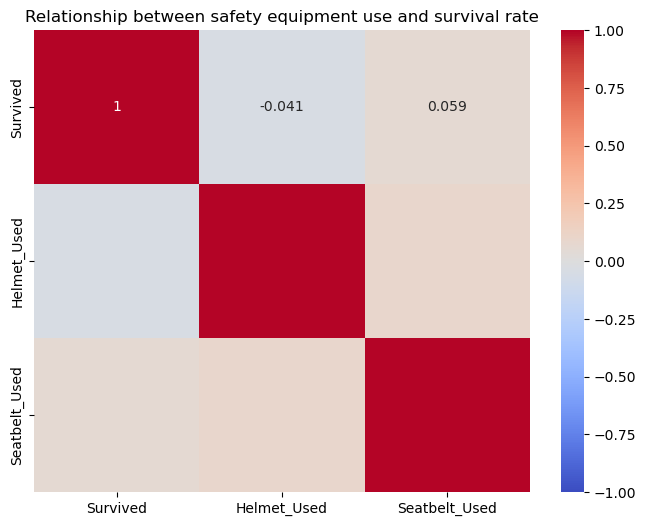

In [18]:
correlation = data[["Seatbelt_Used", "Helmet_Used", "Survived"]].corr()
correlation = correlation[["Survived", "Helmet_Used", "Seatbelt_Used"]] 
correlation = correlation.loc[["Survived", "Helmet_Used", "Seatbelt_Used"]] 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Relationship between safety equipment use and survival rate")
plt.savefig("correlation_heatmap.png")
plt.show()